In [ ]:
!unzip '/content/project_data.zip'
!unzip '/content/stopwords.zip'

Archive:  /content/project_data.zip
  inflating: test/kannada.csv        
  inflating: test/malayalam.csv      
  inflating: test/tamil.csv          
  inflating: train/kannada.csv       
  inflating: train/malayalam.csv     
  inflating: train/tamil.csv         
Archive:  /content/stopwords.zip
  inflating: stopwords/kannada.txt   
  inflating: stopwords/malayalam.txt  
  inflating: stopwords/tamil.txt     


In [ ]:
def seperate_labels(df, lang):
    labels = []

    def get_label(line):
        if '\t' in line:
            temp = line.split('\t')
            sentence, label = temp[0], temp[1]
            if label.lower() == 'not-' + lang:
                return None
            labels.append(label)
            return sentence
        return None

    df['sentence'] = df['sentence'].apply(get_label)
    df.dropna(inplace=True)

    df['labels'] = labels

    return df

In [ ]:
import pandas as pd
import numpy as np
import os

languages = ['tamil', 'malayalam', 'kannada']

def getData(path):

    DFs = {}

    for lang in languages:
        df = pd.read_csv(path + lang + '.csv', on_bad_lines='skip', names=['sentence'])
        df = seperate_labels(df, lang)
        DFs.update({lang: df})
    return DFs

train_dfs = getData('/content/train/')
test_dfs = getData('/content/test/')

test_dfs['malayalam']

,sentence,labels
0,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,Not_offensive
1,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,Not_offensive
2,Fefka ee padam release cheyyan samadhicho?,Not_offensive
3,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,Not_offensive
4,Ravile thane views likes ethra ayyi enn nokan ...,Not_offensive
...,...,...
1996,Swargatthil ninnu purathaakkappetta daivatthin...,Not_offensive
1997,Ivide Palakkad Jayettan Fans club nnu ashamsak...,Not_offensive
1998,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,Not_offensive
1999,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,Not_offensive


In [ ]:
test_dfs['tamil']

,sentence,labels
0,14.12.2018 epo trailer pathutu irken ... Semay...,Not_offensive
1,Paka thana poro movie la Enna irukunu,Not_offensive
3,Suriya anna vera level anna mass,Not_offensive
4,suma kaththaatha da sound over a pooda kudaath...,Offensive_Untargetede
5,ஆனவக் கொலைகள் நடக்காவிடில் ...நம் அடையாளம் அளி...,Offensive_Targeted_Insult_Group
...,...,...
4069,Sk production /Niya naana lan vrdhu .....rytu....,Not_offensive
4070,Vijay going to next level thalaivaaaaa,Not_offensive
4071,மண்ணு பொண்ணு ரெண்டுமே ஒன்னு அதுல எவன் கைய வச்ச...,Offensive_Targeted_Insult_Group
4073,asuran= aadukalam+pudupettai+ wada chennai..ye...,Not_offensive


In [ ]:
test_dfs['kannada']

,sentence,labels
0,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ,Offensive_Targeted_Insult_Group
1,Anna nim e vedio nodinu mathe chaina apps use ...,Offensive_Targeted_Insult_Group
2,Super anna yenu thappila yela sari agi hellidi...,Not_offensive
5,Kuladalli keelyavudo huchappa,Offensive_Targeted_Insult_Individual
6,ಶೇಕಡ 100(%) ರಷ್ಟು viruses na China ಉತ್ಪನ್ನ ಮಾಡ...,Offensive_Targeted_Insult_Group
...,...,...
771,ನನಗು ಕನ್ನಡ ಸಾಕು,Offensive_Untargetede
773,Startup start maadalu capacity growth maadalu ...,Not_offensive
774,Rashmika idanna nodi thi*a urkimbeku🤣🤣🤣🤣🤣,Offensive_Targeted_Insult_Individual
776,ನೋಡ್ತಾ ಹೋದ್ರೆ ಸಾವಿರಾರು lyrical video ಗಳು,Not_offensive


In [ ]:
unique_labels = list(train_dfs['tamil']['labels'].unique())
train_dfs['tamil']['labels'] = train_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['tamil']['labels'] = test_dfs['tamil']['labels'].apply(lambda x: unique_labels.index(x))

In [ ]:
train_dfs['malayalam']['labels'] = train_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['malayalam']['labels'] = test_dfs['malayalam']['labels'].apply(lambda x: unique_labels.index(x))

In [ ]:
train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(lambda x: x if x in unique_labels else None)
train_dfs['kannada'].dropna(inplace=True)

train_dfs['kannada']['labels'] = train_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))
test_dfs['kannada']['labels'] = test_dfs['kannada']['labels'].apply(lambda x: unique_labels.index(x))

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import re
import demoji

def getstopwords(path):
    stopwords = set()

    for lang in languages:
        f = open(path + lang + '.txt', 'r')
        stopwords = set(f.read().split('\n')) | stopwords
    return stopwords

stopwords = getstopwords('/content/stopwords/')

print("stopwords :-", stopwords, end='\n\n\n')

def clean(text):

    # Remove digits and punctuations    
    text = re.sub(r'\d+|', '', text)
    text = re.sub(r'\.', '', text)
    text = demoji.replace(text, '')

    # Remove stopwords    
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text

def preprocess(DFs):

    # combine all languages sentence into a single DataFrame
    df = pd.concat([DFs[lang] for lang in languages], ignore_index=True)

    # clean sentences
    df['sentence'] = df['sentence'].apply(clean)

    return df

df = preprocess(train_dfs)
df

In [ ]:
sentences = df['sentence'].tolist()
labels = df['labels'].tolist()

In [ ]:
# to find unique words in the whole corpus
def unique_words(sentences):
    words = list(set(' '.join(sentence for sentence in sentences).split()))
    print(f'no of unique words = {len(words)}')
    return words

In [ ]:
vocabulary = unique_words(sentences)

labels_count = len(set(labels))
labels_count

no of unique words = 110471


5

In [ ]:
dict(df['labels'].value_counts())

{0: 41263, 3: 3069, 4: 2861, 2: 2665, 1: 526}

In [ ]:
from collections import defaultdict

index = defaultdict(int)
for i in range(len(vocabulary)):
    index[vocabulary[i]] = i

def frequency(sentences):
    d = defaultdict(int)
    for word in ' '.join(sentence for sentence in sentences).split():
        d[word] += 1
    return d

def frequency_with_label(sentences, labels, labels_count):
    d = defaultdict(list)
    for i in range(len(sentences)):
        for word in list(set(sentences[i].split())):
            if d[word] == []:
                d[word] = [0 for i in range(labels_count)]
            d[word] = [d[word][j] + (1 if labels[i] == j else 0) for j in range(labels_count)]
    return d

In [ ]:
import math

def fuzzy_values(df, words):
    sentences = df['sentence']
    labels = df['labels']
    fuzzy_values = []
    total_words = sum([len(sentence.split()) for sentence in sentences])
    total_sentences = len(sentences)
    each_label_count = dict(df['labels'].value_counts())

    prior_prob = [each_label_count[i]/total_sentences for i in range(labels_count)]

    word_frequency = frequency(sentences)
    word_frequency_with_label = frequency_with_label(sentences, labels, labels_count)

    for t in range(len(words)):
        ut_for_xt = []
        pxt = word_frequency[words[t]] / total_words

        for label in range(labels_count):
            qxt = word_frequency_with_label[words[t]][label] / total_sentences
            KtU = 0 if qxt == 0 else -pxt*(math.log(qxt, 10))

            pxt_label = qxt
            qxt_label = qxt / prior_prob[label]

            KLtU = -pxt_label * (0 if qxt_label == 0 else math.log(qxt_label, 10))

            KLt_xt = KtU - KLtU

            ut_for_xt.append(KLt_xt)
        fuzzy_values.append(ut_for_xt)

    return fuzzy_values

In [ ]:
fuzzy_values = fuzzy_values(df, vocabulary) # fuzzy values => weights for each word for every label

In [ ]:
fuzzy_values

[[-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.0002656998707900965,
  0.0,
  0.0,
  -8.50286364043342e-06,
  -7.897928926505191e-06],
 [-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.000345605724424952, 0.0, 0.0, 0.0, 0.0],
 [-0.0009852936429388588,
  0.0,
  7.483352411609135e-05,
  0.00014326102007127192,
  0.00014386595478520014],
 [0.0, 0.0, 0.0, 0.0, -5.8485890163740306e-05],
 [0.0, 0.0, 0.0, -5.9090824877668536e-05, 0.0],
 [-7.137248460417113e-05, 0.0, -4.7756582998012254e-05, 0.0, 0.0],
 [-0.00015232613561037391, 0.0, 0.0, 0.0, 0.0],
 [-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.00021914090181606696, 0.0, 0.0, 0.0, 0.0],
 [-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.00046574690249691895, 0.0, 0.0, 0.0, 0.0],
 [-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, -5.787417524545928e-05, 0.0, 0.0],
 [0.0, 0.0, -5.787417524545928e-05, 0.0, 0.0],
 [-0.00015232613561037391, 0.0, 0.0, 0.0, 0.0],
 [-8.149007685161816e-05, 0.0, 0.0, 0.0, 0.0],
 [-0.000152326135610

In [ ]:
norm = [[1000,-1000] for i in range(labels_count)]
for i in range(len(fuzzy_values)):
    for j in range(labels_count):
        norm[j][0] = min(norm[j][0], fuzzy_values[i][j])
        norm[j][1] = max(norm[j][1], fuzzy_values[i][j])
print(norm)

# normalization
for i in range(len(fuzzy_values)):
    for j in range(labels_count):
        fuzzy_values[i][j] = (fuzzy_values[i][j] - norm[j][0]) / (norm[j][1] - norm[j][0])

fuzzy_values

[[-0.06915171556760705, 0.0016443440350250907], [-0.00010646683953032291, 0.030775196603209085], [-0.0005506593529061315, 0.023649551897101804], [-0.002124391135853607, 0.02002720658806793], [-0.0018729419613733227, 0.022178748223640483]]


[[0.9756224552388431,
  0.0034475746336570592,
  0.02275432008495178,
  0.09590238872744941,
  0.07787153197825243],
 [0.9730204771771765,
  0.0034475746336570592,
  0.02275432008495178,
  0.09551853995290926,
  0.07754315884248726],
 [0.9756224552388431,
  0.0034475746336570592,
  0.02275432008495178,
  0.09590238872744941,
  0.07787153197825243],
 [0.9718918006084049,
  0.0034475746336570592,
  0.02275432008495178,
  0.09590238872744941,
  0.07787153197825243],
 [0.9628561576347087,
  0.0034475746336570592,
  0.025846587476463366,
  0.10236968837132857,
  0.08385306399028711],
 [0.9767735090871646,
  0.0034475746336570592,
  0.02275432008495178,
  0.09590238872744941,
  0.07543985712655399],
 [0.9767735090871646,
  0.0034475746336570592,
  0.02275432008495178,
  0.09323482381343617,
  0.07787153197825243],
 [0.9757653670379491,
  0.0034475746336570592,
  0.0207809247908096,
  0.09590238872744941,
  0.07787153197825243],
 [0.9746218902475658,
  0.0034475746336570592,
  0.0227543200849

In [ ]:
maxsenlen = max([len(sen.split()) for sen in sentences])
def features(sentences):
    features = []
    for sen in sentences:
        sen_fuzzy = []
        for word in sen.split():
            sen_fuzzy.append(fuzzy_values[index[word]])
        for i in range(maxsenlen - min(maxsenlen, len(sen_fuzzy))):
            sen_fuzzy.append([0 for i in range(labels_count)])
        features.append(sen_fuzzy)
    return np.array(features)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, train_size=0.8)

In [ ]:
X_train = features(x_train)
X_test = features(x_test)

In [ ]:
X_train.shape

(40307, 186, 5)

In [ ]:
X_train = np.reshape(X_train, newshape=(X_train.shape[0],-1))
X_test = np.reshape(X_test, newshape=(X_test.shape[0],-1))
X_test.shape

(10077, 930)

In [ ]:
# convert sentiments to catogorical vectors

def categorical(y):
    ans = [[0 for j in range(labels_count)] for i in range(len(y))]
    j =  0
    for i in y:
        ans[j][i] = 1
        j += 1
    return np.array(ans)

Y_train = categorical(y_train)
Y_test = categorical(y_test)

In [ ]:
Y_test.shape

(10077, 5)

In [ ]:
import tensorflow as tf

# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(X_train.shape[1],)))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=labels_count, activation='sigmoid'))

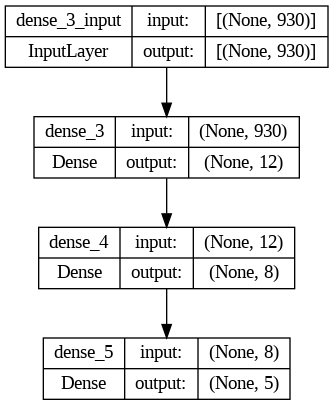

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
ann.compile(optimizer = 'adam', loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
history = ann.fit(X_train, Y_train, batch_size = 32, epochs = 50, validation_data=(X_test, Y_test))

Epoch 1/50
1260/1260 [==============================] - 7s 4ms/step - loss: 0.2615 - accuracy: 0.8061 - val_loss: 0.2266 - val_accuracy: 0.8197
Epoch 2/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2237 - accuracy: 0.8188 - val_loss: 0.2209 - val_accuracy: 0.8197
Epoch 3/50
1260/1260 [==============================] - 5s 4ms/step - loss: 0.2177 - accuracy: 0.8188 - val_loss: 0.2165 - val_accuracy: 0.8197
Epoch 4/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2119 - accuracy: 0.8189 - val_loss: 0.2116 - val_accuracy: 0.8196
Epoch 5/50
1260/1260 [==============================] - 4s 3ms/step - loss: 0.2078 - accuracy: 0.8192 - val_loss: 0.2103 - val_accuracy: 0.8206
Epoch 6/50
1260/1260 [==============================] - 5s 4ms/step - loss: 0.2059 - accuracy: 0.8199 - val_loss: 0.2077 - val_accuracy: 0.8205
Epoch 7/50
1260/1260 [==============================] - 4s 4ms/step - loss: 0.2050 - accuracy: 0.8195 - val_loss: 0.2073 - val_accuracy:

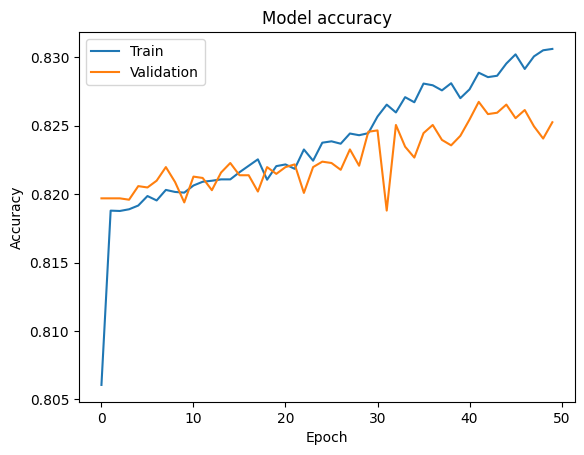

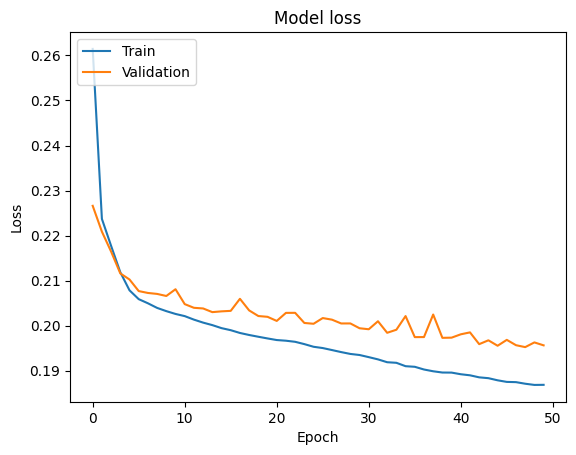

In [ ]:
from matplotlib import pyplot as plt

# plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# prediction

# X_test_features = []

# for sen in x_test:
#     test_sen_fuzzy = []
#     for word in sen:
#         if index[word] > 0:
#             test_sen_fuzzy.append(fuzzy_values[index[word]-1])
#     if len(test_sen_fuzzy) < maxsenlen:
#         for i in range(maxsenlen-len(test_sen_fuzzy)):
#             test_sen_fuzzy.append([0 for j in range(labels_count)])
#     else:
#         test_sen_fuzzy = test_sen_fuzzy[:maxsenlen]
#     X_test_features.append(test_sen_fuzzy)

# X_test_features = np.array(X_test_features)
# X_test = np.reshape(X_test_features, newshape=(-1,129,))

predict = ann.predict(X_test, batch_size=50, verbose=1)
y_pred = np.array(predict)
y_pred

202/202 [==============================] - 0s 1ms/step


array([[9.32422817e-01, 5.69045637e-03, 2.94119734e-02, 3.07991132e-02,
        1.08312126e-02],
       [9.24889088e-01, 7.10778311e-03, 2.89337821e-02, 2.36116368e-02,
        2.17363201e-02],
       [9.61662948e-01, 4.05906187e-03, 1.62544493e-02, 1.15147689e-02,
        1.49851302e-02],
       ...,
       [6.23578608e-01, 1.26528032e-02, 1.59555092e-01, 1.20446961e-02,
        8.25394988e-02],
       [5.63878179e-01, 1.26824565e-02, 1.07594103e-01, 1.62958816e-01,
        3.96309197e-02],
       [9.89069402e-01, 6.43442734e-04, 1.78428274e-03, 8.63046444e-04,
        1.38518140e-02]], dtype=float32)

In [ ]:
def getlabels(y_pred):
    pred_labels = []
    for pred in y_pred:
        temp = list(pred)
        pred_labels.append(temp.index(max(temp)))
    return pred_labels

Y_test_labels = getlabels(Y_test)
Y_pred_labels = getlabels(y_pred)    

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
print("Accuracy = {:2f}".format(accuracy * 100))

Accuracy = 82.524561


In [ ]:
y_true, y_pred = Y_test_labels, Y_pred_labels

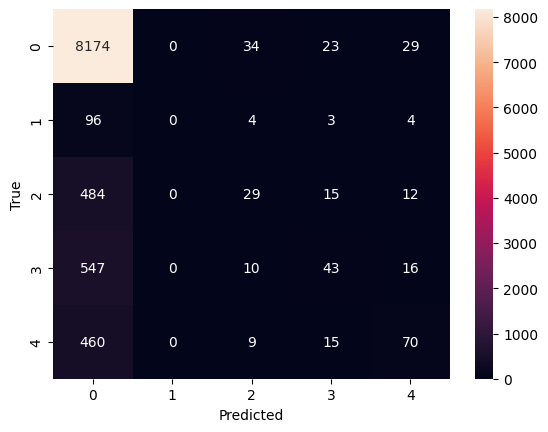

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


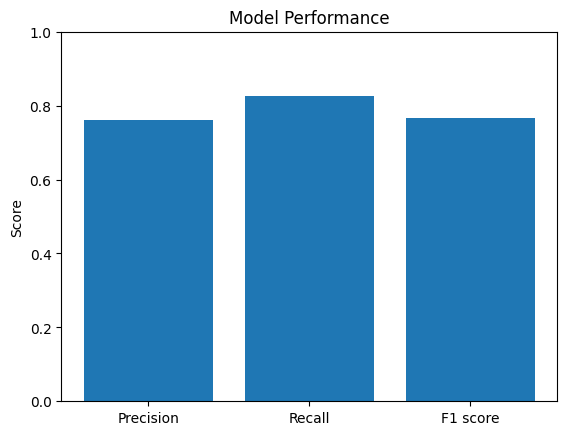

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'F1 score'], [precision, recall, f1_score])
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Model Performance')
plt.show()


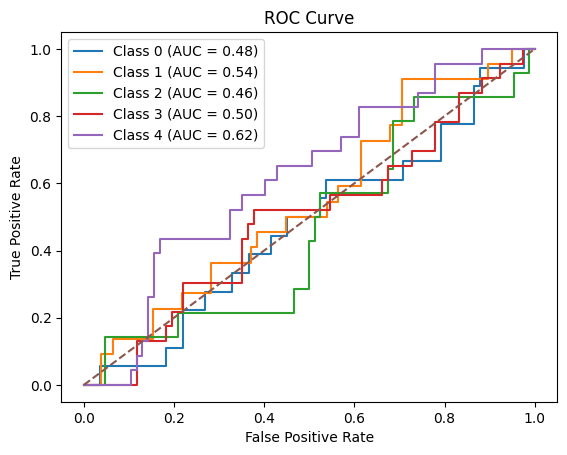

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate random multiclass labels
num_classes = 5
y_true = y_true
y_score = y_pred
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true == i, y_score[:, i])

# Plot ROC curve for each class
fig, ax = plt.subplots()
for i in range(num_classes):
    ax.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()


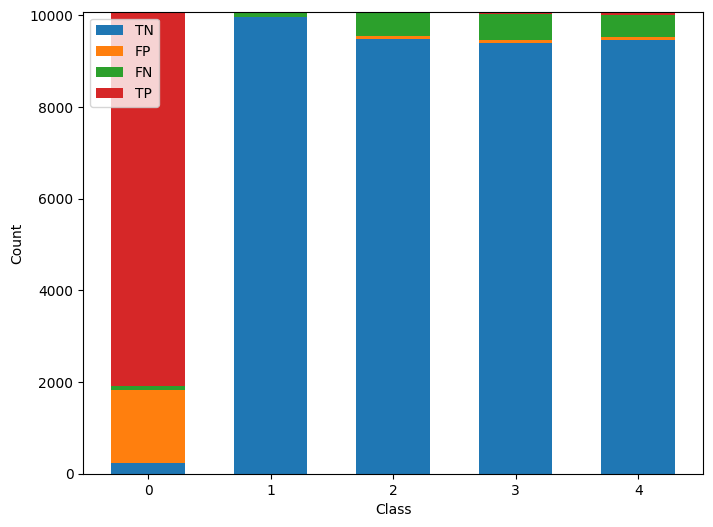

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

n_classes = 5

# Compute the confusion matrix and the TN, FP, FN, and TP for each class
cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))
tn = []
fp = []
fn = []
tp = []
for i in range(n_classes):
    tn_i = np.sum(np.delete(np.delete(cm, i, 0), i, 1))
    fp_i = np.sum(np.delete(cm, i, 0)[:, i])
    fn_i = np.sum(cm[i, :]) - cm[i, i]
    tp_i = cm[i, i]
    tn.append(tn_i)
    fp.append(fp_i)
    fn.append(fn_i)
    tp.append(tp_i)

# Plot the stacked bar chart
labels = list(range(n_classes))
plt.figure(figsize=(8, 6))
plt.bar(labels, tn, width=0.6, label='TN')
plt.bar(labels, fp, width=0.6, bottom=tn, label='FP')
plt.bar(labels, fn, width=0.6, bottom=np.array(tn)+np.array(fp), label='FN')
plt.bar(labels, tp, width=0.6, bottom=np.array(tn)+np.array(fp)+np.array(fn), label='TP')
plt.xticks(labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()
